Ans:-1

Boosting in Machine Learning is an ensemble learning technique that combines multiple weak learners to create a strong learner with much better accuracy.

###  How It Improves Weak Learners
  *  Start with a weak learner (e.g., a small decision tree with depth=1, called a stump).

  * Evaluate errors: Find the instances where the model predicts incorrectly.

  * Reweight data: Increase the importance of the misclassified samples so the next model focuses on them.

  * Train the next model: Fit it to the updated dataset (with new weights).

  * Repeat the process for several rounds.

  * Combine models: Aggregate all weak models into one strong model.

Ans:-2

### 1. AdaBoost Boosting

* **Idea:** Adjusts **sample weights** after each round so the next model focuses on harder-to-predict samples.
* **Training process:**

  1. Start with all samples having equal weights.
  2. Train a weak learner (e.g., decision stump).
  3. Increase the weight of misclassified samples, decrease the weight of correctly classified ones.
  4. Train the next learner on this reweighted dataset.
  5. Combine learners with weights proportional to their accuracy.
* **Key point:** Focuses on **reweighting data points** to fix errors.

### 2. Gradient Boosting

* **Idea:** Uses gradient descent on the loss function to fit new models to the residual errors of previous models.
* **Training process:**

  1. Train a weak learner to predict the target.
  2. Calculate residuals (errors = actual − predicted).
  3. Train the next learner to predict these residuals.
  4. Add the predictions of all learners together (with a learning rate) to update the model.
  5. Repeat until the error is minimized.
* **Key point:** Focuses on **fitting to residuals** using gradients, not just adjusting sample weights.



Ans:-3

Regularization in **XGBoost** helps by **controlling model complexity** and **preventing overfitting**, which is especially important since boosting can create very complex models if left unchecked.


## How Regularization Works in XGBoost

XGBoost adds a regularization term to its objective function:

$$
\text{Objective} = \text{Loss function} + \Omega(f)
$$


### Effects of Regularization

1. L2 regularization (`lambda`)

   * Shrinks leaf weights toward zero
   * Prevents overly large weights that can cause overfitting

2. L1 regularization (`alpha`)

   * Encourages sparsity (sets some leaf weights to zero)
   * Makes the model simpler and faster

3. Tree complexity penalty (`gamma`)

   * Adds a cost for each leaf
   * Forces the algorithm to create a new leaf only if it improves the model enough



Ans:-4

CatBoost is considered efficient for handling categorical data because it has built-in, optimized techniques to process categorical features without the need for manual preprocessing like one-hot encoding or label encoding.


Ans:-5

Boosting techniques are often preferred over bagging methods when high prediction accuracy is needed, and slightly more computation time is acceptable.

### 1. Credit Risk & Fraud Detection

*  Fraud cases are rare (class imbalance problem).

*  Boosting methods handle imbalanced datasets better because they focus more on misclassified cases in later iterations.

**Example:** Banks predicting loan defaults or detecting fraudulent credit card transactions.

### 2. Online Advertising Click-Through Rate (CTR) Prediction

*  Large datasets with both numerical and categorical features.

*  Boosting methods like CatBoost handle categorical variables efficiently and deliver top leaderboard results in CTR prediction competitions.

**Example:** Google Ads predicting whether a user will click an ad.

### 3. Medical Diagnosis

*  High stakes — you want the lowest possible error rate.

*  Boosting reduces bias, making predictions more accurate than bagging in many cases.

**Example:** Predicting cancer from medical images or lab test results.

## Ans:- 6

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [12]:
data= load_breast_cancer()


In [13]:
x= data.data
y= data.target

In [14]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=2)

In [15]:
x_train.shape, x_test.shape

((398, 30), (171, 30))

In [16]:
model= AdaBoostClassifier(n_estimators=1000, random_state=1)
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=1000, random_state=1)

In [17]:
y_prd= model.predict(x_test)
y_prd

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [27]:
print("Performence")
print(f'Accurcy Score: {accuracy_score(y_test, y_prd)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_prd)}')
print(f'Classification Report: {classification_report(y_test, y_prd)}')

Performence
Accurcy Score: 0.9824561403508771
Confusion Matrix: [[ 65   2]
 [  1 103]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.98      0.99      0.99       104

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Ans:-7

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [4]:
data1= fetch_california_housing()


In [5]:
x1= data1.data
y1= data1.target

In [6]:
x1

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
y1

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.3, random_state=2)

In [9]:
x1_train.shape, y1_train.shape

((14448, 8), (14448,))

In [10]:
model1= GradientBoostingRegressor(n_estimators=1000, random_state=1)
model1.fit(x1_train, y1_train)

GradientBoostingRegressor(n_estimators=1000, random_state=1)

In [11]:
y_prd1= model1.predict(x1_test)
y_prd1

array([2.76279808, 1.59405007, 0.90818645, ..., 1.98740903, 2.11278328,
       1.99090903])

In [12]:
print("Performence")
print(f'R2 Score: {r2_score(y1_test, y_prd1)}')
print(f'Mean Squared Error: {mean_squared_error(y1_test, y_prd1)}')
print(f'Mean Absolute Error: {mean_absolute_error(y1_test, y_prd1)}')

Performence
R2 Score: 0.8345075538463114
Mean Squared Error: 0.2239063178858536
Mean Absolute Error: 0.3139067570058348


## Ans:-8

In [15]:
!pip install xgboost

In [19]:
from xgboost import XGBRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [20]:
data2= load_breast_cancer()


In [21]:
x3= data2.data
y3= data2.target

In [22]:
x3_train, x3_test, y3_train, y3_test= train_test_split(x3,y3, test_size=0.3, random_state=2)

In [23]:
model3= XGBRegressor()
model3.fit(x3_train, y3_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
y_prd3= model3.predict(x3_test)
y_prd3

array([ 8.2388991e-01,  3.0214805e-02,  1.0000647e+00, -5.6593330e-04,
        8.9032300e-02, -9.8654556e-05,  1.0059196e+00,  9.9970597e-01,
        1.0000871e+00,  9.9929345e-01,  1.9898858e-02,  1.0000776e+00,
        8.3023465e-01,  1.0000647e+00,  9.9984962e-01,  2.3880398e-02,
        9.9995464e-01,  1.0004929e+00,  9.7920740e-01, -1.0441282e-04,
        9.5248419e-01,  1.0000954e+00,  1.0000871e+00,  9.9995464e-01,
        1.0039893e+00, -9.4627678e-05,  1.0000175e+00,  1.7909005e-01,
       -2.8923558e-04,  4.9875329e-05,  9.9329132e-01,  9.9990731e-01,
        1.0000954e+00,  5.8341833e-05, -5.4995756e-04,  1.0003153e+00,
        1.0000914e+00,  9.9678874e-01,  9.9988294e-01,  1.0000647e+00,
       -1.4907341e-04, -2.3825114e-04,  9.9891317e-01,  1.0006262e+00,
       -3.2271773e-03,  1.0000647e+00,  1.0000956e+00,  1.0007663e+00,
       -8.2189756e-05, -2.0742300e-04,  1.0004807e+00,  3.5905406e-02,
        1.6676075e-03,  9.9998760e-01,  1.0000647e+00,  6.0096405e-02,
      

In [26]:
print("Performence")
print(f'r2 Score: {r2_score(y3_test, y_prd3)}')
print(f'Mean Squared Error: {mean_squared_error(y3_test, y_prd3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y3_test, y_prd3)}')

Performence
r2 Score: 0.7922080755233765
Mean Squared Error: 0.04951588436961174
Mean Absolute Error: 0.06541624665260315


In [27]:
from sklearn.model_selection import GridSearchCV

param1= {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
}

In [28]:
grid1= GridSearchCV(estimator=model3, param_grid=param1, cv=5, n_jobs=-1, verbose=2)
grid1.fit(x3_train, y3_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [2, 3, 5, 10, 15],
                         'n_estimators': [100, 500, 900, 1100, 1500]},
             verbose=2)

In [30]:
grid1.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}

In [33]:
best_grid= grid1.best_estimator_
prd= best_grid.predict(x3_test)

print("final Performence")
print(f'r2 Score: {r2_score(y3_test, prd)}')
print(f'Mean Squared Error: {mean_squared_error(y3_test, prd)}')
print(f'Mean Absolute Error: {mean_absolute_error(y3_test, prd)}')

final Performence
r2 Score: 0.809425950050354
Mean Squared Error: 0.04541293531656265
Mean Absolute Error: 0.1070399135351181


## Ans:-9


In [34]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [35]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = load_breast_cancer()
X, y = data.data, data.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
cl= CatBoostClassifier()
cl

In [40]:
cl.fit(X_train, y_train)

Learning rate set to 0.00736
0:	learn: 0.6812707	total: 103ms	remaining: 1m 43s
1:	learn: 0.6692554	total: 151ms	remaining: 1m 15s
2:	learn: 0.6584000	total: 193ms	remaining: 1m 4s
3:	learn: 0.6482154	total: 238ms	remaining: 59.2s
4:	learn: 0.6375285	total: 275ms	remaining: 54.6s
5:	learn: 0.6284122	total: 310ms	remaining: 51.3s
6:	learn: 0.6165950	total: 345ms	remaining: 48.9s
7:	learn: 0.6064602	total: 383ms	remaining: 47.4s
8:	learn: 0.5955532	total: 416ms	remaining: 45.8s
9:	learn: 0.5862556	total: 456ms	remaining: 45.2s
10:	learn: 0.5759064	total: 489ms	remaining: 44s
11:	learn: 0.5665626	total: 515ms	remaining: 42.4s
12:	learn: 0.5565223	total: 543ms	remaining: 41.2s
13:	learn: 0.5480549	total: 569ms	remaining: 40.1s
14:	learn: 0.5396360	total: 588ms	remaining: 38.6s
15:	learn: 0.5311919	total: 611ms	remaining: 37.6s
16:	learn: 0.5238194	total: 629ms	remaining: 36.3s
17:	learn: 0.5156165	total: 649ms	remaining: 35.4s
18:	learn: 0.5084395	total: 671ms	remaining: 34.7s
19:	learn: 0

In [41]:
y_prd4= cl.predict(X_test)
y_prd4


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [42]:
print("Performence")
print(f'r2 Score: {r2_score(y_test, y_prd4)}')
print(f'Accurcy Score: {accuracy_score(y_test, y_prd4)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_prd4)}')

Performence
r2 Score: 0.8879790370127744
Accurcy Score: 0.9736842105263158
Confusion Matrix: [[41  2]
 [ 1 70]]


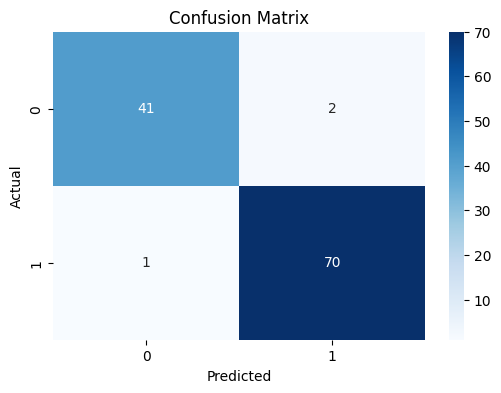

In [45]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_prd4), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
